In [1]:
# INSTRUCTIONS
# Run each cell and enter input as queried

# Run the final cell to see the 3d model

import matplotlib.pyplot as plt
from matplotlib.patches import Circle
import mpl_toolkits.mplot3d.art3d as art3d
import math

In [2]:
SLIDES_HEIGHT = 24.5 

BOTTOM_GOAL = 7.62
MIDDLE_GOAL = 15.24
TOP_GOAL = 38.1 # make these an inch above the reg height

X_GOAL = int(input('Enter x coordinate of goal '))
Y_GOAL = int(input('Enter y coordinate of goal '))
print((X_GOAL, Y_GOAL))

Enter x coordinate of goal 2
Enter y coordinate of goal 3
(2, 3)


In [3]:
def user_input():
    x_coord = int(input('Enter x coordinate of outake '))
    y_coord = int(input('Enter y coordinate of outake '))
    z_coord = int(input("Enter height of outake "))
    inp = input("Enter which goal you would like to reach: enter 'bottom', 'middle', 'top' ")
    goal = TOP_GOAL
    if inp == 'bottom':
        goal = BOTTOM_GOAL
    elif inp == 'middle':
        goal = MIDDLE_GOAL

    return x_coord, y_coord, z_coord, goal
    

In [15]:
def calculate_vector_length(slides_z, slides_x, slides_y, goal_z, goal_x, goal_y): #formula sqrt((a2-a1)^2+(b2-b1)^2+(c2-c1)^2)
    return round((math.sqrt(
        (goal_z-slides_z)**2+(goal_x-slides_x)**2+(goal_y-slides_y)**2)), 2)

def x_angle_to_goal(slide_x, goal_x, slide_y, goal_y):
    side_a = goal_y - slide_y
    side_b = goal_x - slide_x
    angle_radians = math.atan(side_a/side_b)
    return  round((angle_radians * 180 / math.pi), 2)

def angle_of_elevation(slide_y, goal_y, slide_z, goal_z):
    side_a = goal_z - slide_z    # y
    side_b = goal_y - slide_y     # x
    angle_radians = math.atan(side_a/side_b)
    return  round((angle_radians * 180 / math.pi), 2)
    


Enter x coordinate of outake 9
Enter y coordinate of outake 8
Enter height of outake 12
Enter which goal you would like to reach: enter 'bottom', 'middle', 'top' top


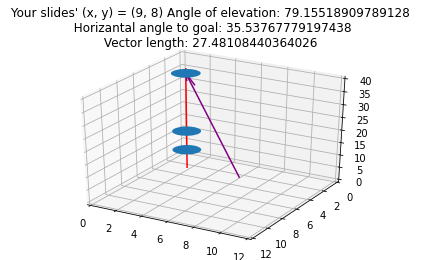

In [16]:
x_coord, y_coord, z_coord, goal = user_input()
info_title = f" Your slides' (x, y) = {x_coord, y_coord} Angle of elevation: {angle_of_elevation(y_coord, Y_GOAL, z_coord, goal)} \n  Horizantal angle to goal: {x_angle_to_goal(x_coord, X_GOAL, y_coord, Y_GOAL)} \n Vector length: {calculate_vector_length(z_coord, x_coord, y_coord, goal, X_GOAL, Y_GOAL)} "

subplot3d = plt.subplot(111, projection='3d', title=info_title)
subplot3d.set_xlim([0, 12])
subplot3d.set_ylim([12, 0])
#subplot3d.set_zlim([-9, 9])
subplot3d.set_zlim([0, 40])



subplot3d.quiver([x_coord], [y_coord], [z_coord], [X_GOAL-x_coord], [Y_GOAL-y_coord], [goal-z_coord], arrow_length_ratio=.1, color='purple') #Top to bottom vector

subplot3d.quiver([X_GOAL], [Y_GOAL], [0], [0], [0], [TOP_GOAL + 2], arrow_length_ratio=0, color='red') #Top to bottom vector

p1 = Circle((X_GOAL, Y_GOAL), 1) # the tuple is the xy coord   3rd par is r
p2 = Circle((X_GOAL, Y_GOAL), 1) # the tuple is the xy coord
p3 = Circle((X_GOAL, Y_GOAL), 1) # the tuple is the xy coord



subplot3d.add_patch(p1)
art3d.pathpatch_2d_to_3d(p1, z=BOTTOM_GOAL, zdir="z")
subplot3d.add_patch(p2)
art3d.pathpatch_2d_to_3d(p2, z=MIDDLE_GOAL, zdir="z")
subplot3d.add_patch(p3)
art3d.pathpatch_2d_to_3d(p3, z=TOP_GOAL, zdir="z")

In [12]:
plt.show()